In [146]:
#Import libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier
warnings.filterwarnings("ignore")

In [147]:
df = pd.read_csv('data\LoanExport.csv')
df

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,PostalCode,LoanSeqNum,LoanPurpose,OrigLoanTerm,NumBorrowers,SellerName,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment
0,0,199902,N,202901,16974,25,1,O,89,27,...,60400,F199Q1268030,P,360,2,FL,WASHINGTONMUTUALBANK,0,0,52
1,0,199902,N,202901,19740,0,1,O,73,17,...,80200,F199Q1015092,N,360,1,FT,CHASEHOMEFINANCELLC,0,0,144
2,0,199902,N,202901,29940,0,1,O,75,16,...,66000,F199Q1266886,N,360,2,FL,WASHINGTONMUTUALBANK,0,0,67
3,0,199902,N,202901,31084,0,1,O,76,14,...,90700,F199Q1178167,N,360,2,GM,GMACMTGECORP,0,0,35
4,0,199902,N,202901,35644,0,1,O,78,18,...,7600,F199Q1178517,N,360,2,GM,GMACMTGECORP,0,0,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291446,839,199903,N,202902,37964,0,1,O,60,32,...,19400,F199Q1220925,N,360,2,Ot,Other servicers,0,0,12
291447,840,200210,N,202904,35644,0,1,O,73,0,...,11600,F199Q1401332,P,319,2,Ot,Other servicers,0,0,53
291448,840,200304,N,202904,42044,0,1,O,73,31,...,92800,F199Q1401282,N,313,1,Ot,Other servicers,0,0,38
291449,845,199904,N,202903,37964,0,1,I,80,54,...,19300,F199Q1220924,P,360,2,Ot,Other servicers,0,0,32


## Dataset
#### This dataset come from Freddie Mac's public dataset, under single family loan-level, standard quartly for 1999 Q1.
#### There are 30 columns, three contain only null values (Super Conforming Flag, Special Eligibility Program, Interest Only Indicator)

In [148]:
df.describe()

,CreditScore,FirstPaymentDate,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,OrigInterestRate,OrigLoanTerm,EverDelinquent,MonthsDelinquent,MonthsInRepayment
count,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000,291451.000000
mean,708.936991,199904.760553,202902.367043,9.216685,1.026022,76.960529,30.033453,124940.387921,76.937986,6.926547,359.835375,0.197848,1.837729,60.805291
std,68.408791,13.821228,16.090508,12.648273,0.202986,15.236154,13.203974,53657.440624,15.225298,0.343541,2.286939,0.398378,8.809392,46.142599
min,0.000000,199901.000000,202402.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,0.000000,4.000000,301.000000,0.000000,0.000000,1.000000
25%,675.000000,199903.000000,202902.000000,0.000000,1.000000,70.000000,22.000000,83000.000000,70.000000,6.750000,360.000000,0.000000,0.000000,34.000000
50%,717.000000,199904.000000,202903.000000,0.000000,1.000000,80.000000,31.000000,117000.000000,80.000000,6.875000,360.000000,0.000000,0.000000,48.000000
75%,753.000000,199905.000000,202904.000000,25.000000,1.000000,90.000000,39.000000,160000.000000,90.000000,7.125000,360.000000,0.000000,0.000000,63.000000
max,849.000000,201303.000000,204302.000000,55.000000,4.000000,110.000000,65.000000,497000.000000,103.000000,12.350000,361.000000,1.000000,180.000000,212.000000


#### There are 459k rows where the average credit score is 750.7, average MIP (Mortage Insurance Percentage) is 3.9, average OCLTV (Original Combined Loan-To-Value) is 68.9, average DTI (Deb-To-Income ratio) is 80.8, average OrigUPB (Originial Unpaid Principal Balance) is 114305.3, average LTV (Loan-To-Value ratio) is 68.8, average interest rate is 6.8%.

In [149]:
df.duplicated().sum() #duplicates check

0

In [150]:
df.isnull().sum() #null values check

CreditScore               0
FirstPaymentDate          0
FirstTimeHomebuyer        0
MaturityDate              0
MSA                       0
MIP                       0
Units                     0
Occupancy                 0
OCLTV                     0
DTI                       0
OrigUPB                   0
LTV                       0
OrigInterestRate          0
Channel                   0
PPM                       0
ProductType               0
PropertyState             0
PropertyType              0
PostalCode                0
LoanSeqNum                0
LoanPurpose               0
OrigLoanTerm              0
NumBorrowers              0
SellerName            24994
ServicerName              0
EverDelinquent            0
MonthsDelinquent          0
MonthsInRepayment         0
dtype: int64

## Handling Missing Values

In [151]:
for col in ['MSA', 'PropertyType', 'NumBorrowers']: #Loop to remove NaN values and replace with Other
    df[col] = df[col].str.strip()
    df[col] = df[col].replace('X', 'Other')

In [152]:
for col in ['FirstTimeHomebuyer','SellerName']: #Loop to fill missing values with thier mode
    mode = df[col].mode()
    df[col] = df[col].fillna(mode)[0]

In [153]:
df['PPM'] = df['PPM'].replace('X','Other') #Replace NaN with Other

## EDA

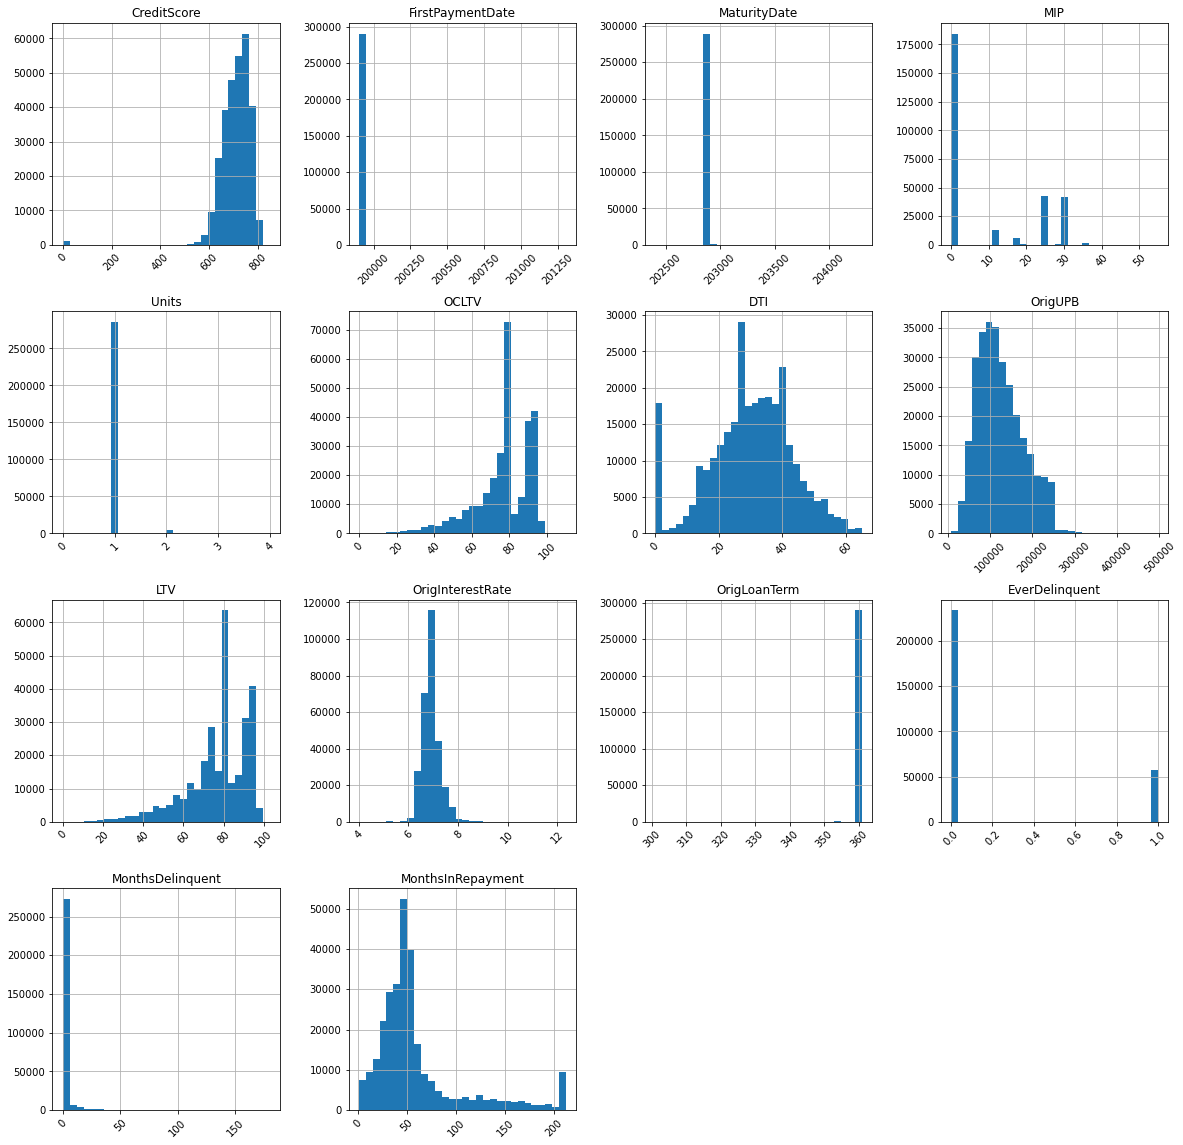

In [154]:
df.hist(bins = 30, figsize=(20,20),xrot=45)
plt.show()

#### Credit Score is skewed left, with interest rates mostly falling within 6-8%. Most values for MIP and Units are on the smaller side. LTV and OCLTV is also skewed left. DTI follows a rough normal distribution with a center around 30. OrigUPB fall between 0-30,000 with a fall-off around 250,000.

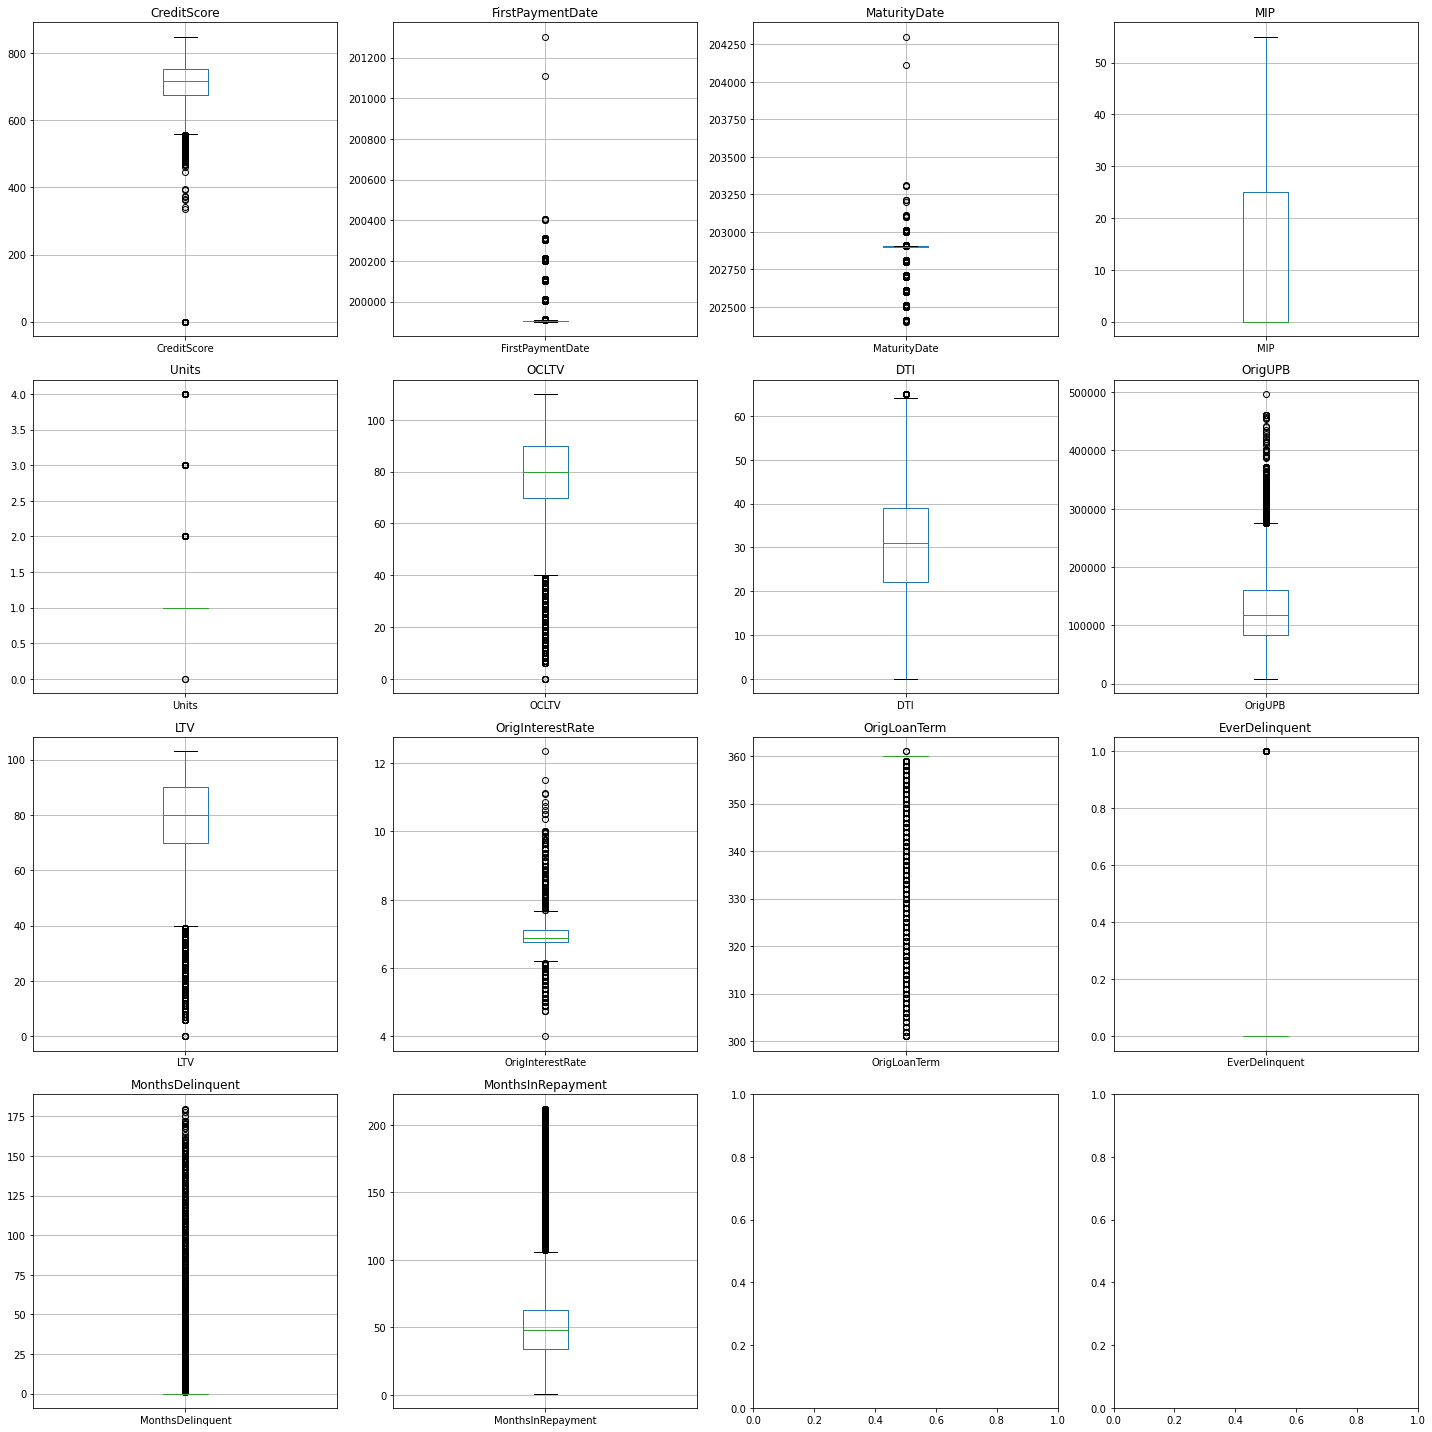

In [155]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
axes = axes.flatten()

cols = df.select_dtypes(include='number').columns #select only numerical columns

for i, col in enumerate(cols): #plot boxplots for all columns
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

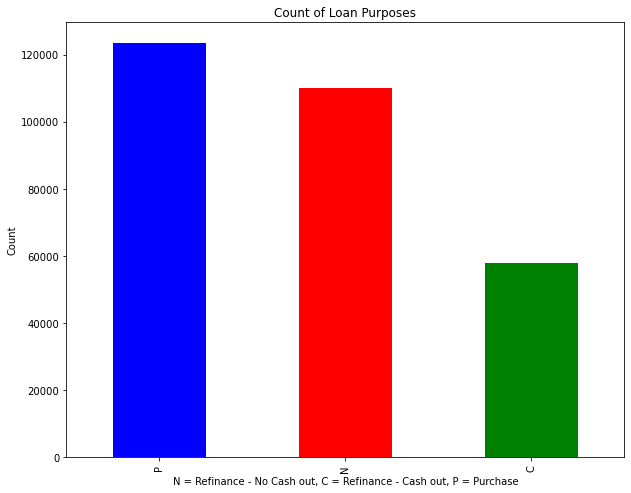

In [156]:
df['LoanPurpose'].value_counts().plot(kind='bar',figsize=(10,8),  color = ['b','r','g'])
plt.title('Count of Loan Purposes')
plt.xlabel('N = Refinance - No Cash out, C = Refinance - Cash out, P = Purchase')
plt.ylabel('Count')
plt.show()

#### Loan purposes are mostly refinances with no cash out, and refinance with cashout + purchases are relatively close

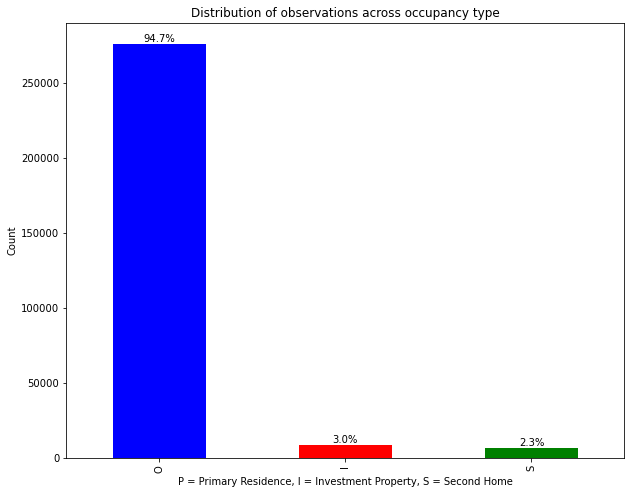

In [157]:
ax = df['Occupancy'].value_counts().plot(kind='bar',figsize=(10,8),  color = ['b','r','g'])
occupancy_counts = df['Occupancy'].value_counts()
occupancy_percentages = (occupancy_counts/occupancy_counts.sum())*100

for container in ax.containers:
    ax.bar_label(container, labels=[f'{v:.1f}%' for v in occupancy_percentages.values])
plt.title('Distribution of observations across occupancy type')
plt.xlabel('P = Primary Residence, I = Investment Property, S = Second Home')
plt.ylabel('Count')
plt.show()

#### 94.7% of observations are owner occupied

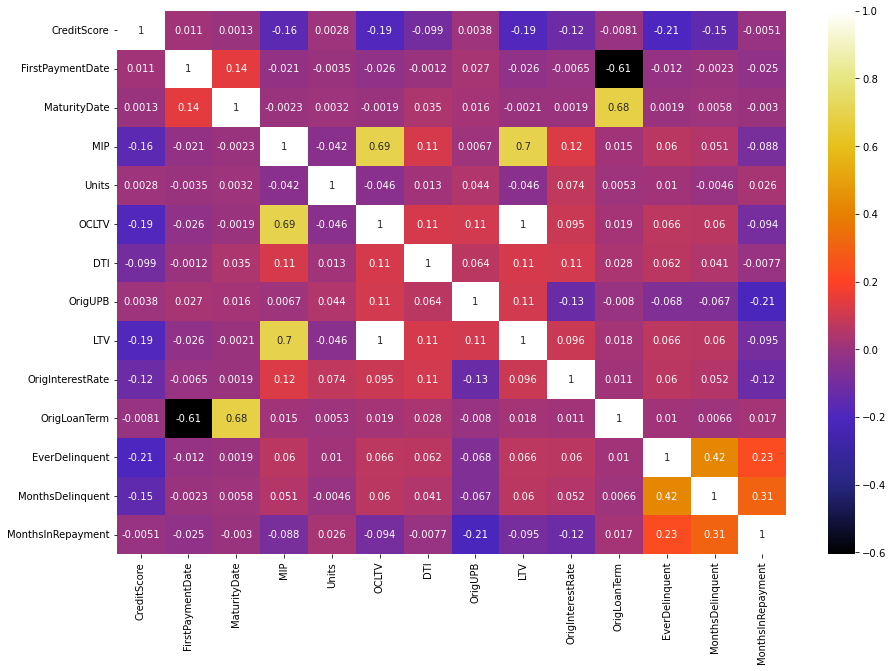

In [158]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap)
plt.show()

#### High correlation is seen between Original Loan Term & Maturity Date, MIP & LTV, MIP & OCLTV, Original Interest Rate & Maturity Date.

In [159]:
#trimming df from outliers
def trim_outliers(df, col):
    u_limit = df[col].quantile(0.85)
    l_limit = df[col].quantile(0.15)
    df[col] = np.where(df[col]<=u_limit,u_limit,
                       np.where(df[col]>=l_limit,l_limit,df[col]))

In [160]:
numer_cols = ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV',
              'OrigUPB','OrigInterestRate','OrigLoanTerm', 'MonthsDelinquent',
              'MonthsInRepayment']

for col in numer_cols:
    trim_outliers(df,col) #loop to remove outliers

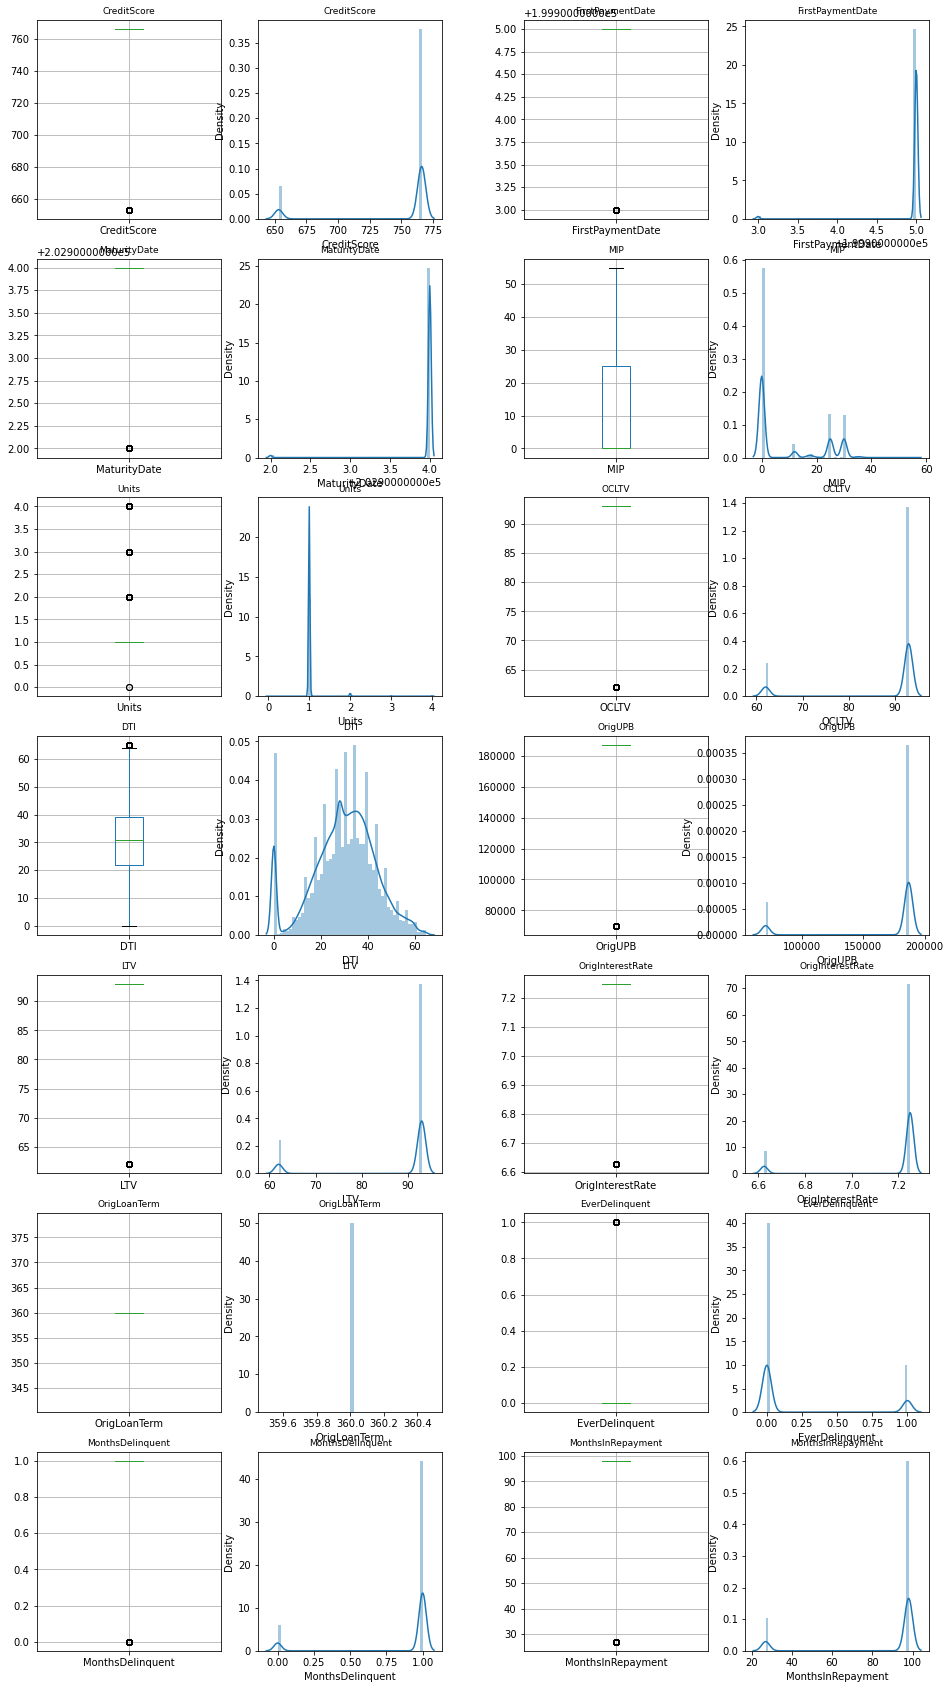

In [161]:
fig = plt.figure(figsize=(16,30))
outer_gs = gs.GridSpec(7, 2, figure=fig, wspace=0.2, hspace=0.2)

cols = df.select_dtypes(include='number').columns #select only numerical columns

for i, col in enumerate(cols):
    row_idx = i // 2
    col_idx = i % 2

    inner_gs = outer_gs[row_idx, col_idx].subgridspec(1, 2, wspace=0.2)

    #boxplot on left
    left_box = fig.add_subplot(inner_gs[0])
    df.boxplot(column=col, ax=left_box)
    left_box.set_title(f'{col}', fontsize=9)

    #dist plot on the right
    right_dist = fig.add_subplot(inner_gs[1])
    sns.distplot(df[col], ax=right_dist)
    right_dist.set_title(f'{col}', fontsize=9)

plt.tight_layout()
plt.show()

#### Categorical Encoding

In [162]:
for col in ['Occupancy','Channel','PPM','LoanPurpose','NumBorrowers','FirstTimeHomebuyer']:
    ordinal_mapping = {k:i for i,k in enumerate(df[col].unique(),0)} #Assign labels 
    df[col] = df[col].map(ordinal_mapping)
for col in ['PostalCode','ServicerName','MSA']:
    frequency_map = (df[col].value_counts()/len(df)).to_dict()
    df[col] = df[col].map(frequency_map)
for col in ['PropertyState','PropertyType']:
    count_map = df[col].value_counts().to_dict()
    df[col] = df[col].map(count_map)
df.drop(['SellerName','ProductType','LoanSeqNum'],axis=1,inplace=True)

In [163]:
for col in ['CreditScore','FirstPaymentDate','MaturityDate','LTV','OCLTV','OrigUPB','OrigLoanTerm','MonthsInRepayment']:
    df[col] = df[col].round(1).astype(int) #Round values to optimize

In [164]:
for col in ['FirstPaymentDate', 'MaturityDate']: #Date columns to datetime
    df[col] = df[col].astype(str)
    df[col] = pd.to_datetime(df[col],format="%Y%m")

In [165]:
df['FirstPaymentYear'] = df['FirstPaymentDate'].dt.year #extract year and month from columns to drop original later
df['FirstPaymentMonth'] = df['FirstPaymentDate'].dt.month
df['MaturityYear'] = df['MaturityDate'].dt.year
df['MaturityMonth'] = df['MaturityDate'].dt.month

In [166]:
df.head(5)

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MSA,MIP,Units,Occupancy,OCLTV,DTI,...,OrigLoanTerm,NumBorrowers,ServicerName,EverDelinquent,MonthsDelinquent,MonthsInRepayment,FirstPaymentYear,FirstPaymentMonth,MaturityYear,MaturityMonth
0,766,1999-05-01,0,2029-04-01,0.030094,25,1,0,93,27,...,360,0,0.077632,0,1.0,98,1999,5,2029,4
1,766,1999-05-01,0,2029-04-01,0.018991,0,1,0,93,17,...,360,1,0.018525,0,1.0,27,1999,5,2029,4
2,766,1999-05-01,0,2029-04-01,0.000261,0,1,0,93,16,...,360,0,0.077632,0,1.0,98,1999,5,2029,4
3,766,1999-05-01,0,2029-04-01,0.032040,0,1,0,93,14,...,360,0,0.039664,0,1.0,98,1999,5,2029,4
4,766,1999-05-01,0,2029-04-01,0.014253,0,1,0,93,18,...,360,0,0.039664,0,1.0,98,1999,5,2029,4


#### Feature Scaling

In [167]:
df['FirstPaymentDate'].value_counts()

1999-05-01    286932
1999-03-01      4519
Name: FirstPaymentDate, dtype: int64

In [168]:
#Out-Of-Time Validation cutoff set
df_oot = df[df['FirstPaymentDate'] >= pd.Timestamp('1999-06-01')]

In [169]:
#Remaining Data for train/test split
df_tt = df[df['FirstPaymentDate'] <= pd.Timestamp('1999-06-01')]

In [170]:
df_oot.shape, df_tt.shape

((0, 29), (291451, 29))

In [171]:
df_tt.drop(['FirstPaymentDate','MaturityDate'],axis=1,inplace=True) #Drop date columns

In [172]:
X = df_tt.drop('EverDelinquent', axis=1) #Set up train test split 
y = df_tt['EverDelinquent']

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state=111)

X_train.shape, X_test.shape

((204015, 26), (87436, 26))

In [173]:
ss = SS() #Standard Scaler
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#### Building & Testing Models

In [174]:
X = df_tt[['MonthsDelinquent','CreditScore','MaturityMonth','FirstPaymentMonth','OrigLoanTerm','OrigInterestRate',
     'OrigUPB','Units','PropertyType','MaturityYear','FirstPaymentYear','DTI','MIP']]
y = df_tt['EverDelinquent']

In [175]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state=111)

X_train.shape, X_test.shape

((204015, 13), (87436, 13))

In [176]:
def LogRegModel(X_train, X_test, y_train, y_test, penalty, solver, l1_ratio):
    modelname = LogReg(max_iter=500,penalty=penalty, solver=solver, l1_ratio=l1_ratio, random_state=111)
    modelname.fit(X_train, y_train)

    y_train_pred = modelname.predict(X_train)
    y_test_pred = modelname.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    print('Logistic Regression Model with ' +penalty+ ' Results')
    print(f"Train Accuracy: ", acc_train)
    print(f"Test Test: ", acc_test)
    print('Classification Report:\n', classification_report(y_test,y_test_pred))
    print('Confusion Matrix:\n', confusion_matrix(y_test,y_test_pred))
    print('ROC AUC score:', roc_auc_score(y_test, y_test_pred))

In [177]:
LogRegModel(X_train, X_test, y_train, y_test, 'l1', 'liblinear', 0.0)
print('\n')
LogRegModel(X_train, X_test, y_train, y_test, 'l2', 'sag', 0.0)
print('\n')
LogRegModel(X_train, X_test, y_train, y_test, 'elasticnet', 'saga', 0.5)

Logistic Regression Model with l1 Results
Train Accuracy:  0.9206872043722275
Test Test:  0.9201701816185552
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     70179
           1       1.00      0.60      0.75     17257

    accuracy                           0.92     87436
   macro avg       0.95      0.80      0.85     87436
weighted avg       0.93      0.92      0.91     87436

Confusion Matrix:
 [[70179     0]
 [ 6980 10277]]
ROC AUC score: 0.7977632265167758


Logistic Regression Model with l2 Results
Train Accuracy:  0.801945935347891
Test Test:  0.8026327828354454
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     70179
           1       0.00      0.00      0.00     17257

    accuracy                           0.80     87436
   macro avg       0.40      0.50      0.45     87436
weighted avg       0.64      0.80      0.71     87

In [178]:
model_rf = RF(n_estimators=200, random_state=111, n_jobs=-1)
model_rf.fit(X_train, y_train)

pred_train_rf = model_rf.predict(X_train)
pred_test_rf = model_rf.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, pred_test_rf)

print('Random Forest Model Results')
print(f"Train Accuracy: {accuracy_train_rf:.4f}")
print(f"Test Accuracy: {accuracy_test_rf:.4f}")

Random Forest Model Results
Train Accuracy: 0.9224
Test Accuracy: 0.9185


#### Gradient Boosting Classifier

In [179]:
X=df[['MonthsDelinquent','CreditScore','MaturityMonth','FirstPaymentMonth','OrigLoanTerm','OrigInterestRate',
     'OrigUPB','Units','PropertyType','MaturityYear','FirstPaymentYear','DTI','MIP']]
y=df['EverDelinquent']

In [180]:
gbc = GBC()
gbc.fit(X_train, y_train)

pred_train_gbc = model_rf.predict(X_train)
pred_test_gbc = model_rf.predict(X_test)

accuracy_train_gbc = accuracy_score(y_train, pred_train_gbc)
accuracy_test_gbc = accuracy_score(y_test, pred_test_gbc)

print('Gradient Boosting Classifier Results')
print(f"Train Accuracy: {accuracy_train_gbc:.4f}")
print(f"Test Accuracy: {accuracy_test_gbc:.4f}")

Gradient Boosting Classifier Results
Train Accuracy: 0.9224
Test Accuracy: 0.9185
